In [1]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv('/content/mobile_price_classification.csv')

In [4]:
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
x = data.drop('price_range', axis = 1)
y = data['price_range']

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [7]:
x_train.shape

(1500, 20)

In [8]:
y_train.shape

(1500,)

In [9]:
from keras.models import Sequential

In [10]:
from keras.layers import Dense

In [42]:
model = Sequential()
model.add(Dense(10,activation = 'relu'))
model.add(Dense(1,activation = 'tanh'))

In [43]:
from keras.src.engine.training import optimizer
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [44]:
history = model.fit(x_train,y_train,epochs = 100 )

Epoch 1/100
47/47 [==============================] - 1s 2ms/step - loss: 23.6813 - accuracy: 0.1473
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 23.8160 - accuracy: 0.1427
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 23.2442 - accuracy: 0.1547
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 22.8360 - accuracy: 0.1540
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 22.8718 - accuracy: 0.1547
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 9.5093 - accuracy: 0.2007
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: -7.6450 - accuracy: 0.2547
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: -7.6450 - accuracy: 0.2547
Epoch 9/100
47/47 [==============================] - 0s 2ms/step - loss: -7.6450 - accuracy: 0.2547
Epoch 10/100
47/47 [==============================] - 0s 2ms/step - loss: -7.6450 - accuracy: 0.2547


In [45]:
y_pred = model.predict(x_test)

16/16 [==============================] - 0s 4ms/step


In [46]:
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [47]:
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test,y_pred)

0.236

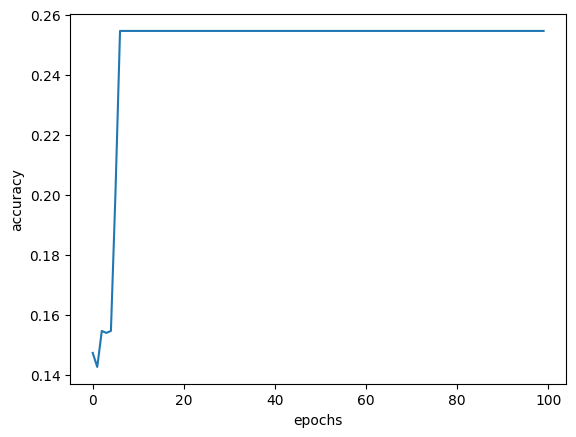

In [50]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [51]:
#tried different activation functions as elu, softmax, swish, gelu, tanh etc. But didn't get accuracy as 1. so it shows the accuracy by tanh and it is 0.236